# 1. Data import and Understanding

In [69]:
# Read libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
import keras

In [86]:
# import data
df = pd.read_csv('Signal.csv')

In [87]:
df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [88]:
# check missing values
df.isnull().sum() # no nulls present

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [89]:
# check for duplicates
duplicates = df[df.duplicated()]
duplicates

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [90]:
drop duplicates
df.drop_duplicates(inplace=True)

In [91]:
df.shape

(1359, 12)

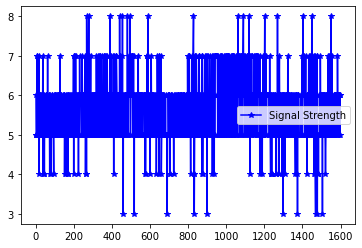

In [92]:
# visualize distribution of target variable
plt.plot(df.Signal_Strength,color='b',marker='*',label='Signal Strength')
plt.legend()

In [93]:
# check for class imbalance
df.Signal_Strength.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

Insights from initial data analysis
1. Given data is having class imbalance (more records of class 5,6 than class 3,4,7,8). so we need to do oversampling.
2.There were 240 duplicates present in data, which are removed to reduce redundancy

In [94]:
s3= df[df['Signal_Strength']==3]  
s8= df[df['Signal_Strength']==8] 
s4=df[df['Signal_Strength']==4]  
s7=df[df['Signal_Strength']==7]  

In [95]:
df=pd.concat([df,s3,s3,s3,s3,s3,s3,s3,s3,s3,s3,s3,s3,s3,s3,s3,s3,s8,s8,s8,s8,s8,s8,s8,s8,s8,s8,s8,s4,s4,s4,s4,s4,s7])

In [96]:
df.Signal_Strength.value_counts()

5    577
6    535
7    334
4    318
8    204
3    170
Name: Signal_Strength, dtype: int64

# 2.Data preprocessing

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#train test split
signal_train,signal_test= train_test_split(df,test_size=0.3)

In [38]:
signal_train_x=signal_train.iloc[:,0:-1]
signal_train_y=signal_train.iloc[:,-1]

In [39]:
signal_test_x=signal_test.iloc[:,0:-1]
signal_test_y=signal_test.iloc[:,-1]

In [40]:
# normalize data
signal_train_x = tf.keras.utils.normalize(signal_train_x)
signal_test_x = tf.keras.utils.normalize(signal_test_x)

In [ ]:
# transform labels into format acceptable by neural network
signal_train_x=np.array(signal_train_x)
signal_train_y=np.array(signal_train_y)

# 3.Model Training & Evaluation using Neural Network

In [51]:
from keras.layers import Dropout

In [58]:
# design neural network to train classifier
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20,activation=tf.nn.relu))  # first hidden layer
model.add(tf.keras.layers.Dense(20,activation=tf.nn.relu))  # second hidden layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.relu))  #third hidden layer
#model.add(tf.keras.layers.Dense(18,activation=tf.nn.relu))
model.add(Dropout(0.15))  # 15% neurons dropped to avoid overfitting
model.add(tf.keras.layers.Dense(6,activation=tf.nn.softmax))  # output layer
adam= tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
#model.compile(optimizer='adam',loss='mse',metrics=['accuracy','mse'])

In [60]:
#train the classifier using previously designed Architecture.
model1 = model.fit(signal_train_x,signal_train_y,epochs=10,validation_split=0.2, batch_size=42)

Epoch 1/10
53/53 [==============================] - 1s 5ms/step - loss: 31.7815 - accuracy: 0.0955 - val_loss: 31.0913 - val_accuracy: 0.1779
Epoch 2/10
53/53 [==============================] - 0s 3ms/step - loss: 31.7814 - accuracy: 0.1095 - val_loss: 31.0913 - val_accuracy: 0.0998
Epoch 3/10
53/53 [==============================] - 0s 3ms/step - loss: 31.7814 - accuracy: 0.1141 - val_loss: 31.0913 - val_accuracy: 0.0907
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 31.7814 - accuracy: 0.1727 - val_loss: 31.0913 - val_accuracy: 0.1851
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 31.7814 - accuracy: 0.1632 - val_loss: 31.0913 - val_accuracy: 0.1706
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 31.7814 - accuracy: 0.1655 - val_loss: 31.0913 - val_accuracy: 0.1706
Epoch 7/10
53/53 [==============================] - 0s 2ms/step - loss: 31.7814 - accuracy: 0.1364 - val_loss: 31.0913 - val_accuracy: 0.1724
Epoch 

In [61]:
pred_val = model.predict(signal_test_x)
pred_val

37/37 [==============================] - 0s 3ms/step


array([[0.16666473, 0.16666888, 0.16666509, 0.16666071, 0.16666934,
        0.16667125],
       [0.16666473, 0.16666888, 0.16666509, 0.16666071, 0.16666934,
        0.16667125],
       [0.16666473, 0.16666888, 0.16666509, 0.16666071, 0.16666934,
        0.16667125],
       ...,
       [0.16666473, 0.16666888, 0.16666509, 0.16666071, 0.16666934,
        0.16667125],
       [0.16666473, 0.16666888, 0.16666509, 0.16666071, 0.16666934,
        0.16667125],
       [0.16666473, 0.16666888, 0.16666509, 0.16666071, 0.16666934,
        0.16667125]], dtype=float32)

In [63]:
pred_classes = np.argmax(pred_val,axis=1)
pred_classes

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
conf_mat = confusion_matrix(signal_test_y,pred_classes) 
conf_mat

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 113,   0,   0,   0],
       [  0,   0,   0, 253,   0,   0,   0],
       [  3,   0,   0, 206,   0,   0,   0],
       [  2,   2,   1, 186,   0,   0,   0],
       [  6,   2,   5, 238,   0,   0,   0],
       [  0,   0,   0, 163,   0,   0,   0]], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(signal_test_y,pred_classes)*100

17.457627118644066

In [67]:
model1.history

{'loss': [31.781476974487305,
  31.781414031982422,
  31.781417846679688,
  31.781414031982422,
  31.781410217285156,
  31.78141975402832,
  31.781417846679688,
  31.78141975402832,
  31.781417846679688,
  31.781417846679688],
 'accuracy': [0.09545454382896423,
  0.10954545438289642,
  0.11409091204404831,
  0.17272727191448212,
  0.16318181157112122,
  0.16545455157756805,
  0.13636364042758942,
  0.1377272754907608,
  0.12136363983154297,
  0.10863636434078217],
 'val_loss': [31.091297149658203,
  31.09130096435547,
  31.091297149658203,
  31.091297149658203,
  31.091297149658203,
  31.091297149658203,
  31.091297149658203,
  31.091297149658203,
  31.091297149658203,
  31.091297149658203],
 'val_accuracy': [0.17785844206809998,
  0.09981851279735565,
  0.09074410051107407,
  0.1851179599761963,
  0.17059890925884247,
  0.17059890925884247,
  0.17241379618644714,
  0.17241379618644714,
  0.1270417422056198,
  0.17241379618644714]}

In [68]:
df1= pd.DataFrame(model1.history)
df1

,loss,accuracy,val_loss,val_accuracy
0,31.781477,0.095455,31.091297,0.177858
1,31.781414,0.109545,31.091301,0.099819
2,31.781418,0.114091,31.091297,0.090744
3,31.781414,0.172727,31.091297,0.185118
4,31.781410,0.163182,31.091297,0.170599
5,31.781420,0.165455,31.091297,0.170599
6,31.781418,0.136364,31.091297,0.172414
7,31.781420,0.137727,31.091297,0.172414
8,31.781418,0.121364,31.091297,0.127042
9,31.781418,0.108636,31.091297,0.172414


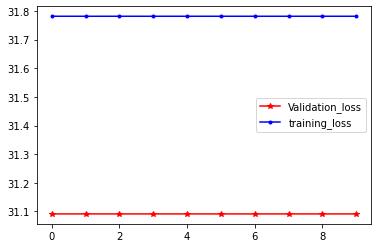

In [97]:
# plot 2 separate visuals
# i. training loss and validation loss
plt.plot(df1.val_loss,color='r',marker='*',label='Validation_loss')
plt.plot(df1.loss,color='b',marker='.',label='training_loss')
plt.legend()

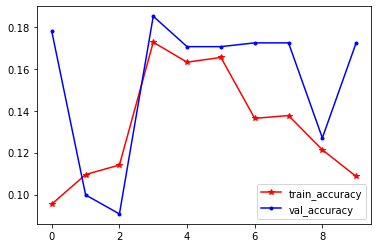

In [98]:
# ii. training accuracy and validation accuracy
plt.plot(df1.accuracy,color='r',marker='*',label='train_accuracy')
plt.plot(df1.val_accuracy,color='b',marker='.',label='val_accuracy')
plt.legend()

In [117]:
#Design new architecture/update existing architecture in attempt to improve the performance of 
# after 6 epoch there is slight variation between training and validation loss , so lets limit epochs=6
model1 = model.fit(signal_train_x,signal_train_y,epochs=8,validation_split=0.2, batch_size=100)

Epoch 1/8
22/22 [==============================] - 0s 5ms/step - loss: 31.7814 - accuracy: 0.1023 - val_loss: 31.0913 - val_accuracy: 0.1978
Epoch 2/8
22/22 [==============================] - 0s 4ms/step - loss: 31.7814 - accuracy: 0.0736 - val_loss: 31.0913 - val_accuracy: 0.1978
Epoch 3/8
22/22 [==============================] - 0s 3ms/step - loss: 31.7814 - accuracy: 0.1018 - val_loss: 31.0913 - val_accuracy: 0.0000e+00
Epoch 4/8
22/22 [==============================] - 0s 3ms/step - loss: 31.7814 - accuracy: 0.0882 - val_loss: 31.0913 - val_accuracy: 0.1270
Epoch 5/8
22/22 [==============================] - 0s 4ms/step - loss: 31.7814 - accuracy: 0.1168 - val_loss: 31.0913 - val_accuracy: 0.0000e+00
Epoch 6/8
22/22 [==============================] - 0s 3ms/step - loss: 31.7814 - accuracy: 0.0950 - val_loss: 31.0913 - val_accuracy: 0.0000e+00
Epoch 7/8
22/22 [==============================] - 0s 4ms/step - loss: 31.7814 - accuracy: 0.0777 - val_loss: 31.0913 - val_accuracy: 0.1978
E

In [118]:
pred_val = model.predict(signal_test_x)
pred_val

37/37 [==============================] - 0s 1ms/step


array([[0.16666715, 0.16666865, 0.16666572, 0.1666661 , 0.16666545,
        0.16666694],
       [0.16666715, 0.16666865, 0.16666572, 0.1666661 , 0.16666545,
        0.16666694],
       [0.16666715, 0.16666865, 0.16666572, 0.1666661 , 0.16666545,
        0.16666694],
       ...,
       [0.16666715, 0.16666865, 0.16666572, 0.1666661 , 0.16666545,
        0.16666694],
       [0.16666715, 0.16666865, 0.16666572, 0.1666661 , 0.16666545,
        0.16666694],
       [0.16666715, 0.16666865, 0.16666572, 0.1666661 , 0.16666545,
        0.16666694]], dtype=float32)

In [119]:
pred_classes = np.argmax(pred_val,axis=1)
pred_classes

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [120]:
model1.history

{'loss': [31.781417846679688,
  31.781414031982422,
  31.781410217285156,
  31.781417846679688,
  31.781414031982422,
  31.781417846679688,
  31.781417846679688,
  31.781414031982422],
 'accuracy': [0.10227272659540176,
  0.07363636046648026,
  0.10181818157434464,
  0.08818181604146957,
  0.11681818217039108,
  0.0949999988079071,
  0.07772727310657501,
  0.10818181931972504],
 'val_loss': [31.091297149658203,
  31.091297149658203,
  31.091297149658203,
  31.091297149658203,
  31.09130096435547,
  31.091297149658203,
  31.091297149658203,
  31.09130096435547],
 'val_accuracy': [0.19782213866710663,
  0.19782213866710663,
  0.0,
  0.1270417422056198,
  0.0,
  0.0,
  0.19782213866710663,
  0.0]}

In [121]:
df2= pd.DataFrame(model1.history)
df2

,loss,accuracy,val_loss,val_accuracy
0,31.781418,0.102273,31.091297,0.197822
1,31.781414,0.073636,31.091297,0.197822
2,31.781410,0.101818,31.091297,0.000000
3,31.781418,0.088182,31.091297,0.127042
4,31.781414,0.116818,31.091301,0.000000
5,31.781418,0.095000,31.091297,0.000000
6,31.781418,0.077727,31.091297,0.197822
7,31.781414,0.108182,31.091301,0.000000


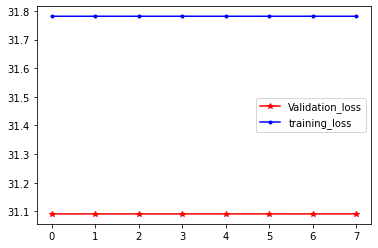

In [122]:
#plot visuals as in Q3.C and share insights about difference observed in both the models
plt.plot(df2.val_loss,color='r',marker='*',label='Validation_loss')
plt.plot(df2.loss,color='b',marker='.',label='training_loss')
plt.legend()

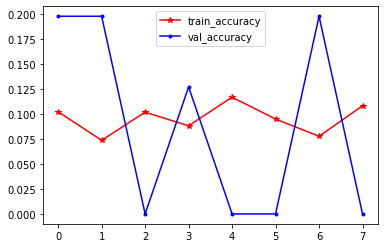

In [123]:
# ii. training accuracy and validation accuracy
plt.plot(df2.accuracy,color='r',marker='*',label='train_accuracy')
plt.plot(df2.val_accuracy,color='b',marker='.',label='val_accuracy')
plt.legend()

# Conclusion

As we increse layers in neural network, in becomes more deeper and require more data to learn. Hence they are called Data Hungry models. Given data is comparatively insufficient and complex. Because there are very few records of some classes ,causing class imbalance. Hence model is getting overfitted even though hyper parameters are tuned. 